### Importing Libraries

In [11]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#from scipy import stats
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

### Getting our Data

In [12]:
df = pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


### Data Preprocessing

In [13]:
df.info()  # checking for null values & datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [14]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

### Data Visualization

<Axes: >

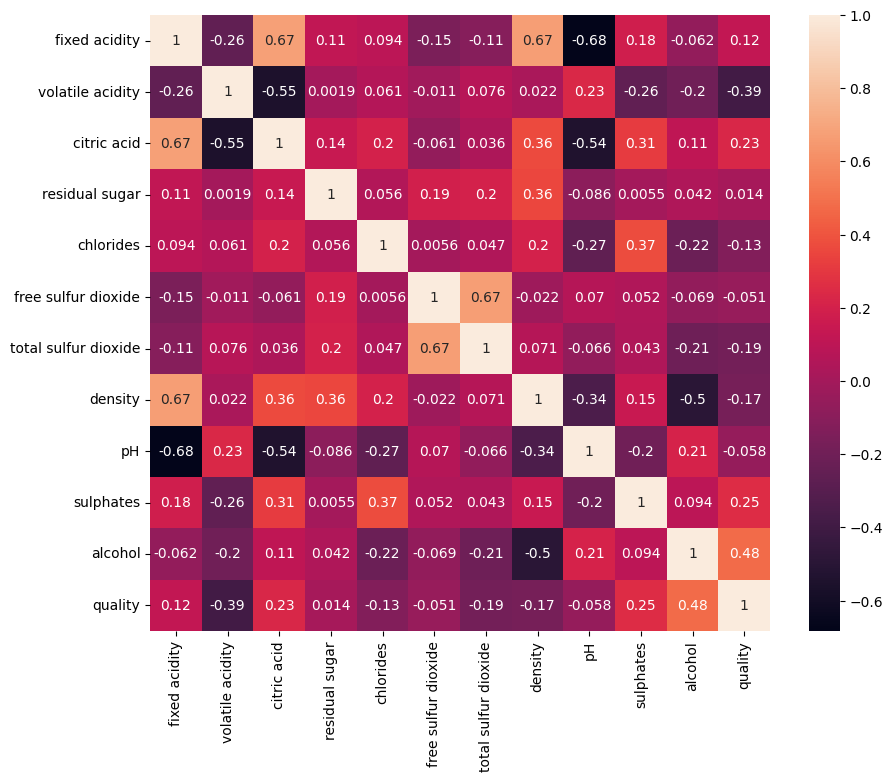

In [15]:
corr = df.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corr, annot=True)  # Vizualization of correlation between features and Output

### Splitting Data for Training and Testing

In [16]:
data = df.values
X,y = data[:,:-1], data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)  # splitting in the ration 80:20

### Building The Neural Network

In [17]:
# sequential model to initialise ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [10]:
classifier = Sequential()

# adding the input layer and the first hidden layer
classifier.add(Dense(units = 500, activation = 'sigmoid', input_dim = 11))

# adding the second hidden layer
classifier.add(Dense(units = 100, activation = 'sigmoid'))

# adding another hidden layer
classifier.add(Dense(units = 50, activation = 'sigmoid'))

# adding the output layer
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100, verbose = 0)

score, acc = classifier.evaluate(X_train, y_train, batch_size = 10)
print('Train score: ', score)
print('Train accuracy: ', acc)

128/128 [==============================] - 0s 2ms/step - loss: -2430.2261 - accuracy: 0.0000e+00
Train score:  -2430.22607421875
Train accuracy:  0.0


### Testing the Model

In [18]:
# predicting the Test set results
y_pred = classifier.predict(X_test)

score, acc = classifier.evaluate(X_test, y_test, batch_size = 10)
print('Test score:', score)
print('Test accuracy:', acc)

32/32 [==============================] - 0s 2ms/step - loss: -2402.5874 - accuracy: 0.0000e+00
Test score: -2402.58740234375
Test accuracy: 0.0


# Predictions

In [19]:
# the predictions
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],


Visualization of Results

In [20]:
# converting results into categorical values
for i in range(0, len(y_pred)):
    if y_pred[i][0] >= 0.5:
        y_pred[i][0] = 1
    else:
        y_pred[i][0] = 0
y_pred

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [21]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[  0,   0,   0,   0,   0,   0,   0],
       [  2,   0,   0,   0,   0,   0,   0],
       [ 11,   0,   0,   0,   0,   0,   0],
       [135,   0,   0,   0,   0,   0,   0],
       [142,   0,   0,   0,   0,   0,   0],
       [ 27,   0,   0,   0,   0,   0,   0],
       [  3,   0,   0,   0,   0,   0,   0]])

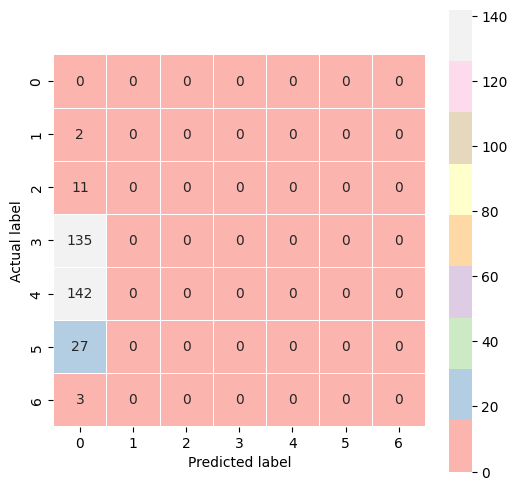

In [22]:
plt.figure(figsize=(6,6))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=0.5, square = True, cmap = 'Pastel1')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [26]:
class_names = ['0','1','2','3','4','5','6']
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       0.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00      11.0
           3       0.00      0.00      0.00     135.0
           4       0.00      0.00      0.00     142.0
           5       0.00      0.00      0.00      27.0
           6       0.00      0.00      0.00       3.0

    accuracy                           0.00     320.0
   macro avg       0.00      0.00      0.00     320.0
weighted avg       0.00      0.00      0.00     320.0



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.